In [96]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

# Metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

# Clustering and Pipelines
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.pipeline import Pipeline

# Rebalancing data
from imblearn.over_sampling  import SMOTE
from collections import Counter

# Saving
import pickle

# Warnings
import warnings
warnings.filterwarnings("ignore")

In [97]:
df_eda = pd.read_csv("../data/processed/df_eda.csv")
df_eda.head()

,Patient_Age,Mother_inherit,Father_inherit,Maternal_gene,Paternal_gene,Blood_cell_count,Mother_age,Father_age,Status,Respiratory_rate,...,Birth_defects,WBC_count,Blood_test,Symptom1,Symptom2,Symptom3,Symptom4,Symptom5,Genetic_disorder,Disorder_subclass
0,2.0,1.0,0.0,1.0,0.0,4.760603,34.886364,42.378320,0.0,0.0,...,0.0,9.857562,3.0,1.0,1.0,1.0,1.0,1.0,0.0,5.0
1,6.0,1.0,0.0,0.0,0.0,4.893297,41.000000,22.000000,0.0,0.0,...,1.0,7.474796,2.0,0.0,1.0,1.0,1.0,1.0,1.0,3.0
2,12.0,1.0,0.0,1.0,0.0,4.705280,21.000000,41.706436,1.0,1.0,...,1.0,7.919321,1.0,0.0,0.0,1.0,0.0,0.0,0.0,6.0
3,11.0,1.0,0.0,1.0,1.0,4.720703,32.000000,40.742424,0.0,1.0,...,0.0,4.098210,3.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,14.0,1.0,0.0,1.0,0.0,5.103188,34.601513,42.015587,1.0,0.0,...,0.0,10.272230,2.0,1.0,0.0,0.0,1.0,0.0,2.0,2.0


In [6]:
# This dataset aims to predict both the genetic disorder and disorder subclass of patients, so we will make two dataframes for each target column.
Genetic_disorder = df_eda.drop(["Disorder_subclass"], axis=1)
Disorder_subclass = df_eda.drop(["Genetic_disorder"], axis=1)

## Divide datasets into train and test

Genetic disorder dataframe

In [7]:
# Split target column from the rest of the columns of the Genetic_disorder dataframe
Genetic_X = Genetic_disorder.drop(["Genetic_disorder"], axis=1)
Genetic_Y = Genetic_disorder["Genetic_disorder"]

In [8]:
# Normalize the data
Genetic_X_scaled = StandardScaler().fit_transform(Genetic_X)

In [9]:
# Divide dataframe into train and test sets
X_Gen_train, X_Gen_test, y_Gen_train, y_Gen_test = train_test_split(Genetic_X_scaled, Genetic_Y, test_size=0.2, random_state=42)

Disorder subclass dataframe

In [10]:
# Split target column from the rest of the columns of the Disorder_subclass dataframe
Subclass_X = Disorder_subclass.drop(["Disorder_subclass"], axis=1)
Subclass_Y = Disorder_subclass["Disorder_subclass"]

In [11]:
# Normalize the data
Subclass_X_scaled = StandardScaler().fit_transform(Subclass_X)

In [12]:
# Divide dataframe into train and test sets
X_Sub_train, X_Sub_test, y_Sub_train, y_Sub_test = train_test_split(Subclass_X_scaled, Subclass_Y, test_size=0.2, random_state=42)

## Model training

In [39]:
# Load all models
log = LogisticRegression(solver="lbfgs", random_state=42)
tree = DecisionTreeClassifier(random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
nb = GaussianNB()
svm = SVC(random_state=42)
bag_clf = BaggingClassifier(base_estimator=tree, n_estimators=500, max_samples=100, bootstrap=True, random_state=42)
ada_clf = AdaBoostClassifier(base_estimator=tree, n_estimators=500, learning_rate=0.5, random_state=42)
rf = RandomForestClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)
xgb = XGBClassifier(random_state=42)
cat = CatBoostClassifier(random_state=42)
lgb = LGBMClassifier(random_state=42)


# List of models
models = [log, tree, knn, nb, svm, bag_clf, ada_clf, rf, gb, xgb, cat, lgb]

#### Train and predict with Genetic_disorder dataframe

In [15]:
log.fit(X_Gen_train, y_Gen_train)
tree.fit(X_Gen_train, y_Gen_train)
knn.fit(X_Gen_train, y_Gen_train)
nb.fit(X_Gen_train, y_Gen_train)
svm.fit(X_Gen_train, y_Gen_train)
bag_clf.fit(X_Gen_train, y_Gen_train)
ada_clf.fit(X_Gen_train, y_Gen_train)
rf.fit(X_Gen_train, y_Gen_train)
gb.fit(X_Gen_train, y_Gen_train)
xgb.fit(X_Gen_train, y_Gen_train)
cat.fit(X_Gen_train, y_Gen_train)
lgb.fit(X_Gen_train, y_Gen_train)

Learning rate set to 0.090669
0:	learn: 1.0437370	total: 158ms	remaining: 2m 37s
1:	learn: 0.9954173	total: 166ms	remaining: 1m 22s
2:	learn: 0.9519931	total: 176ms	remaining: 58.5s
3:	learn: 0.9173343	total: 183ms	remaining: 45.6s
4:	learn: 0.8860966	total: 191ms	remaining: 38.1s
5:	learn: 0.8594925	total: 198ms	remaining: 32.8s
6:	learn: 0.8374632	total: 204ms	remaining: 29s
7:	learn: 0.8158770	total: 210ms	remaining: 26s
8:	learn: 0.7963292	total: 214ms	remaining: 23.6s
9:	learn: 0.7816377	total: 219ms	remaining: 21.7s
10:	learn: 0.7634006	total: 224ms	remaining: 20.1s
11:	learn: 0.7505046	total: 229ms	remaining: 18.9s
12:	learn: 0.7363873	total: 234ms	remaining: 17.8s
13:	learn: 0.7225041	total: 239ms	remaining: 16.8s
14:	learn: 0.7112532	total: 244ms	remaining: 16s
15:	learn: 0.6998249	total: 250ms	remaining: 15.4s
16:	learn: 0.6913115	total: 255ms	remaining: 14.7s
17:	learn: 0.6813337	total: 259ms	remaining: 14.1s
18:	learn: 0.6730113	total: 264ms	remaining: 13.6s
19:	learn: 0.66

LGBMClassifier(random_state=42)

In [93]:
lst_models = []
lst_accuracy = []
lst_precision = []
lst_recall = []
lst_f1 = []
lst_cvs = []


for model in models:
    name = model.__class__.__name__
    prediction = model.predict(X_Gen_test)
    accuracy = metrics.accuracy_score(y_Gen_test, prediction)
    precision = precision_score(y_Gen_test, prediction, average="weighted")
    recall = recall_score(y_Gen_test, prediction, average="weighted")
    f1 = f1_score(y_Gen_test, prediction, average="weighted")
    CVS = cross_val_score(model,X_Gen_test,y_Gen_test,cv=10,verbose=False).mean()

    lst_models.append(name)
    lst_accuracy.append(accuracy)
    lst_precision.append(precision)
    lst_recall.append(recall)
    lst_f1.append(f1)
    lst_cvs.append(CVS)
    
    print("-"*(len(name)+2))
    print("|"+ name + "|")
    print("-"*(len(name)+2))
    print("Accuracy: " + str(accuracy))
    print("Precision: " + str(precision))
    print("Recall: " + str(recall))
    print("F1 Score: " + str(f1))
    print("Cross Validation Score mean: " + str(CVS*100))
    print("--------------------------------------------------------------------------")
    print("")


--------------------
|LogisticRegression|
--------------------
Accuracy: 0.08060941828254847
Precision: 0.3410966305700428
Recall: 0.08060941828254847
F1 Score: 0.11832746630652692
Cross Validation Score mean: 52.29916897506924
--------------------------------------------------------------------------

------------------------
|DecisionTreeClassifier|
------------------------
Accuracy: 0.08227146814404432
Precision: 0.3566517381736544
Recall: 0.08227146814404432
F1 Score: 0.11534337833795757
Cross Validation Score mean: 65.48476454293629
--------------------------------------------------------------------------

----------------------
|KNeighborsClassifier|
----------------------
Accuracy: 0.08088642659279778
Precision: 0.34018250445258513
Recall: 0.08088642659279778
F1 Score: 0.12067988973964217
Cross Validation Score mean: 49.47368421052632
--------------------------------------------------------------------------

------------
|GaussianNB|
------------
Accuracy: 0.08559556786703601


In [95]:
results_df = pd.DataFrame([lst_models, lst_accuracy, lst_precision, lst_recall,
lst_f1, lst_cvs]).T.rename(columns={0: "Models", 1: "Accuracy", 2: "Precision", 3: "Recall", 4: "F1 Score", 5: "CVS"})
for col in ["Accuracy", "Precision", "Recall", "F1 Score", "CVS"]:
    results_df[col] = results_df[col].astype(float)

results_df.sort_values(by="CVS", inplace=True, ascending=False)
results_df

,Models,Accuracy,Precision,Recall,F1 Score,CVS
8,GradientBoostingClassifier,0.115789,0.421988,0.115789,0.162471,0.732133
11,LGBMClassifier,0.122438,0.444494,0.122438,0.168922,0.726593
10,CatBoostClassifier,0.121884,0.386108,0.121884,0.166244,0.723823
9,XGBClassifier,0.124100,0.376578,0.124100,0.168850,0.722992
7,RandomForestClassifier,0.109418,0.334310,0.109418,0.145551,0.703047
5,BaggingClassifier,0.074238,0.269636,0.074238,0.106260,0.670083
6,AdaBoostClassifier,0.084765,0.374500,0.084765,0.118574,0.659280
1,DecisionTreeClassifier,0.082271,0.356652,0.082271,0.115343,0.654848
4,SVC,0.085319,0.395432,0.085319,0.115424,0.545983
3,GaussianNB,0.085596,0.359993,0.085596,0.125954,0.526593


The best model for this target seems to be GradientBoostingClassifier which implies the following scores:
- Accuracy: 0.73
- Precision: 0.79
- Recall: 0.73
- F1 Score: 0.71
- R2 Cross Validation (mean, cv=10): 0.73

In [18]:
metrics_df = results_df.set_index("Models").T
metrics_df

Models,GradientBoostingClassifier,LGBMClassifier,CatBoostClassifier,XGBClassifier,RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,DecisionTreeClassifier,SVC,GaussianNB,LogisticRegression,KNeighborsClassifier
Accuracy,0.761773,0.777839,0.771745,0.768975,0.733241,0.665928,0.678116,0.679501,0.577008,0.535457,0.531856,0.509141
Precision,0.794485,0.779626,0.770576,0.767358,0.739174,0.723123,0.681872,0.681802,0.562928,0.593068,0.566720,0.490587
Recall,0.761773,0.777839,0.771745,0.768975,0.733241,0.665928,0.678116,0.679501,0.577008,0.535457,0.531856,0.509141
F1 Score,0.749628,0.773705,0.768148,0.766093,0.722742,0.619459,0.679652,0.680477,0.538158,0.412431,0.403167,0.493276
R2CV,0.732133,0.726593,0.723823,0.722992,0.703047,0.670083,0.659280,0.654848,0.545983,0.526593,0.522992,0.494737


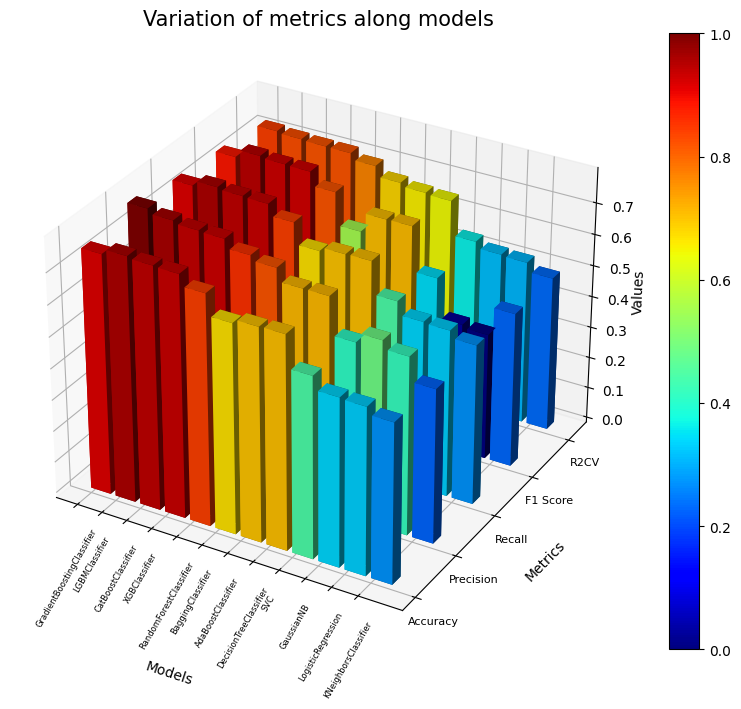

<Figure size 1500x600 with 0 Axes>

In [19]:
x = np.arange(12)
y = np.arange(5)
xpos,ypos = np.meshgrid(x,y)
z = metrics_df.to_numpy()

xpos=xpos.flatten()
ypos=ypos.flatten()
zpos=np.zeros_like(xpos)

dx=0.8*np.ones_like(xpos)
dy=0.2*np.ones_like(xpos)
dz=z.flatten()

fig=plt.figure(figsize = (11,8))
ax=fig.add_subplot(111, projection = "3d")
label = ["Values"]

ax.set_title("Variation of metrics along models", fontsize = 15)
ax.set_xticks(range(12))
ax.set_xticklabels(metrics_df.columns, fontsize = 6, rotation=60)
ax.set_xlabel("Models", labelpad=40)

ax.set_yticklabels(metrics_df.index, fontsize = 8)
ax.set_yticks(range(5))
ax.set_ylabel("Metrics",labelpad=10)

ax.set_zlabel("Values", labelpad=0)
colors = plt.cm.jet((z.flatten() - z.min()).astype(float) / (z.max() - z.min()))

bar = ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color= colors)

plt.figure(figsize=(15,6))
fig.colorbar(plt.cm.ScalarMappable(cmap = 'jet'), ax = ax)

plt.show()

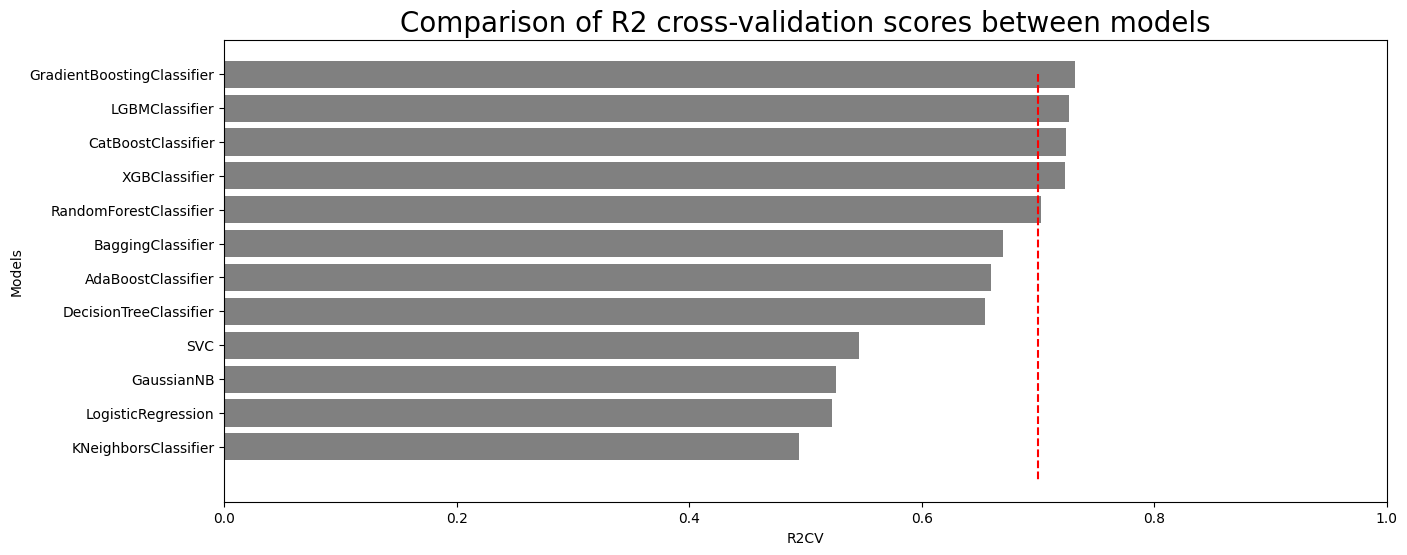

In [20]:
figure = plt.figure(figsize=(15,6))   
sns.barplot(x="R2CV", y="Models", data=results_df, color="grey")
plt.xlabel("R2CV")
plt.ylabel("Models")
plt.xlim(0,1)
plt.vlines(0.7, ymin=0, ymax=12, color='red', linestyle='--')
plt.title("Comparison of R2 cross-validation scores between models", size=20)
plt.show()

# Vertical line aims to highlight the best models (R2CV >= 70%)

<b>Evaluation with Confusion matrix and ROC curves</b>

In [21]:
gb_pred = gb.predict(X_Gen_test)

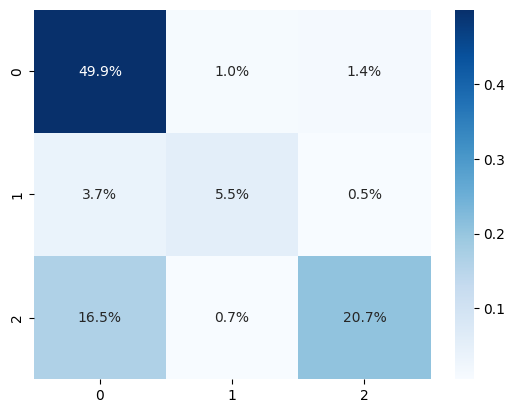

In [22]:
c_matrix = confusion_matrix(y_Gen_test, gb_pred)
sns.heatmap(c_matrix/np.sum(c_matrix), annot=True, fmt='.1%', cmap='Blues');

#### Train and predict with Disorder_subclass dataframe

In [23]:
log.fit(X_Sub_train, y_Sub_train)
tree.fit(X_Sub_train, y_Sub_train)
knn.fit(X_Sub_train, y_Sub_train)
nb.fit(X_Sub_train, y_Sub_train)
svm.fit(X_Sub_train, y_Sub_train)
bag_clf.fit(X_Sub_train, y_Sub_train)
ada_clf.fit(X_Sub_train, y_Sub_train)
rf.fit(X_Sub_train, y_Sub_train)
gb.fit(X_Sub_train, y_Sub_train)
xgb.fit(X_Sub_train, y_Sub_train)
cat.fit(X_Sub_train, y_Sub_train)
lgb.fit(X_Sub_train, y_Sub_train)

Learning rate set to 0.090669
0:	learn: 2.0258075	total: 17.5ms	remaining: 17.5s
1:	learn: 1.9181114	total: 31ms	remaining: 15.5s
2:	learn: 1.8057040	total: 44.6ms	remaining: 14.8s
3:	learn: 1.7361104	total: 58.1ms	remaining: 14.5s
4:	learn: 1.6760174	total: 71.8ms	remaining: 14.3s
5:	learn: 1.6201122	total: 85.5ms	remaining: 14.2s
6:	learn: 1.5713953	total: 100ms	remaining: 14.2s
7:	learn: 1.5177550	total: 115ms	remaining: 14.2s
8:	learn: 1.4771751	total: 128ms	remaining: 14.1s
9:	learn: 1.4420166	total: 141ms	remaining: 14s
10:	learn: 1.4018986	total: 154ms	remaining: 13.9s
11:	learn: 1.3719472	total: 167ms	remaining: 13.7s
12:	learn: 1.3435448	total: 180ms	remaining: 13.6s
13:	learn: 1.3199900	total: 193ms	remaining: 13.6s
14:	learn: 1.2950498	total: 207ms	remaining: 13.6s
15:	learn: 1.2724370	total: 220ms	remaining: 13.5s
16:	learn: 1.2522137	total: 234ms	remaining: 13.6s
17:	learn: 1.2345382	total: 251ms	remaining: 13.7s
18:	learn: 1.2185740	total: 267ms	remaining: 13.8s
19:	learn

LGBMClassifier(random_state=42)

In [91]:
lst_sub_models = []
lst_sub_accuracy = []
lst_sub_precision = []
lst_sub_recall = []
lst_sub_f1 = []
lst_sub_cvs = []


for model in models:
    name = model.__class__.__name__
    prediction = model.predict(X_Sub_test)
    accuracy = metrics.accuracy_score(y_Sub_test, prediction)
    precision = precision_score(y_Sub_test, prediction, average="weighted")
    recall = recall_score(y_Sub_test, prediction, average="weighted")
    f1 = f1_score(y_Sub_test, prediction, average="weighted")
    CVS = cross_val_score(model,X_Sub_test,y_Sub_test,cv=10,verbose=False).mean()
   
    lst_sub_models.append(name)
    lst_sub_accuracy.append(accuracy)
    lst_sub_precision.append(precision)
    lst_sub_recall.append(recall)
    lst_sub_f1.append(f1)
    lst_sub_cvs.append(CVS)
    
    print("-"*(len(name)+2))
    print("|"+ name + "|")
    print("-"*(len(name)+2))
    print("Accuracy: " + str(accuracy))
    print("Precision: " + str(precision))
    print("Recall: " + str(recall))
    print("F1 Score: " + str(f1))
    print("Cross Validation Score mean: " + str(CVS*100))
    print("--------------------------------------------------------------------------")
    print("")

--------------------
|LogisticRegression|
--------------------
Accuracy: 0.3473684210526316
Precision: 0.3724746789836889
Recall: 0.3473684210526316
F1 Score: 0.3536899421784755
Cross Validation Score mean: 40.30470914127424
--------------------------------------------------------------------------

------------------------
|DecisionTreeClassifier|
------------------------
Accuracy: 0.4213296398891967
Precision: 0.42784172107369683
Recall: 0.4213296398891967
F1 Score: 0.4236554999505668
Cross Validation Score mean: 43.29639889196676
--------------------------------------------------------------------------

----------------------
|KNeighborsClassifier|
----------------------
Accuracy: 0.20609418282548475
Precision: 0.2679706336455969
Recall: 0.20609418282548475
F1 Score: 0.2069737040533926
Cross Validation Score mean: 27.39612188365651
--------------------------------------------------------------------------

------------
|GaussianNB|
------------
Accuracy: 0.325207756232687
Precision

In [90]:
results_sub_df = pd.DataFrame([lst_sub_models, lst_sub_accuracy, lst_sub_precision, lst_sub_recall,
lst_sub_f1, lst_sub_cvs]).T.rename(columns={0: "Models", 1: "Accuracy", 2: "Precision", 3: "Recall", 4: "F1 Score", 5: "R2CV"})
for col in ["Accuracy", "Precision", "Recall", "F1 Score", "CVS"]:
    results_df[col] = results_df[col].astype(float)

results_sub_df.sort_values(by="CVS", inplace=True, ascending=False)
results_sub_df

KeyError: 'CVS'

The best model for this target seems to be still GradientBoostingClassifier which implies the following scores:
- Accuracy: 0.67
- Precision: 0.67
- Recall: 0.67
- F1 Score: 0.66
- R2 Cross Validation mean: 0.63

These metrics are worse than those for the Genetic_disorder dataframe.

In [26]:
metrics_df = results_sub_df.set_index("Models").T
metrics_df

Models,GradientBoostingClassifier,CatBoostClassifier,LGBMClassifier,XGBClassifier,RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,DecisionTreeClassifier,LogisticRegression,SVC,KNeighborsClassifier,GaussianNB
Accuracy,0.667867,0.668421,0.662881,0.655956,0.60277,0.502216,0.510803,0.510526,0.419668,0.392521,0.300554,0.390859
Precision,0.671339,0.672326,0.663898,0.656419,0.607755,0.517958,0.512153,0.511465,0.410622,0.37827,0.293065,0.383074
Recall,0.667867,0.668421,0.662881,0.655956,0.60277,0.502216,0.510803,0.510526,0.419668,0.392521,0.300554,0.390859
F1 Score,0.663468,0.66524,0.660227,0.652451,0.590963,0.442504,0.511254,0.510775,0.406585,0.372881,0.290352,0.362586
R2CV,0.634072,0.624931,0.607479,0.603601,0.551247,0.488089,0.435457,0.432964,0.403047,0.380332,0.273961,0.263712


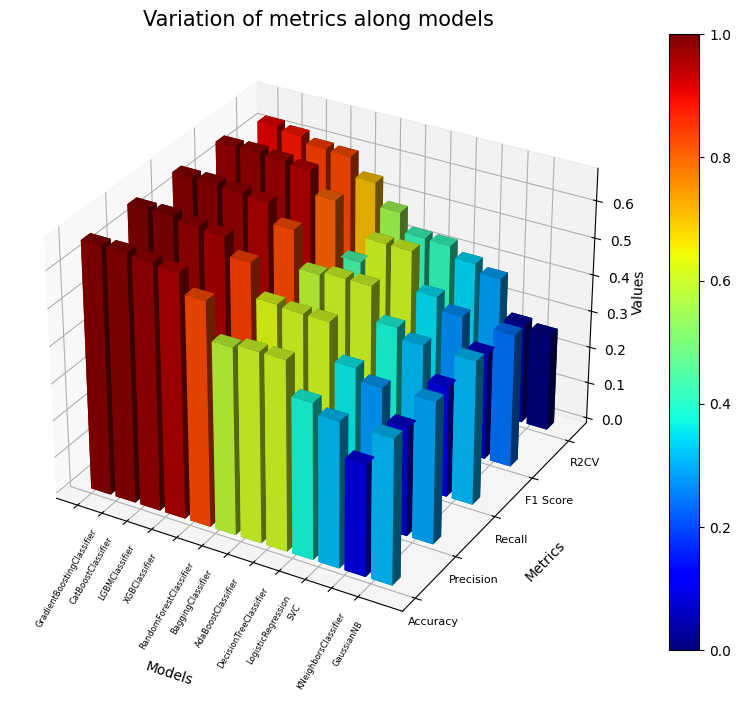

<Figure size 1500x600 with 0 Axes>

In [27]:
x = np.arange(12)
y = np.arange(5)
xpos,ypos = np.meshgrid(x,y)
z = metrics_df.to_numpy()

xpos=xpos.flatten()
ypos=ypos.flatten()
zpos=np.zeros_like(xpos)

dx=0.8*np.ones_like(xpos)
dy=0.2*np.ones_like(xpos)
dz=z.flatten()

fig=plt.figure(figsize = (11,8))
ax=fig.add_subplot(111, projection = "3d")
label = ["Values"]

ax.set_title("Variation of metrics along models", fontsize = 15)
ax.set_xticks(range(12))
ax.set_xticklabels(metrics_df.columns, fontsize = 6, rotation=60)
ax.set_xlabel("Models", labelpad=40)

ax.set_yticklabels(metrics_df.index, fontsize = 8)
ax.set_yticks(range(5))
ax.set_ylabel("Metrics",labelpad=10)

ax.set_zlabel("Values", labelpad=0)
colors = plt.cm.jet(((z.flatten() - z.min())).astype(float) / (z.max() - z.min()))

bar = ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color= colors)

plt.figure(figsize=(15,6))
fig.colorbar(plt.cm.ScalarMappable(cmap = 'jet'), ax = ax)

plt.show()

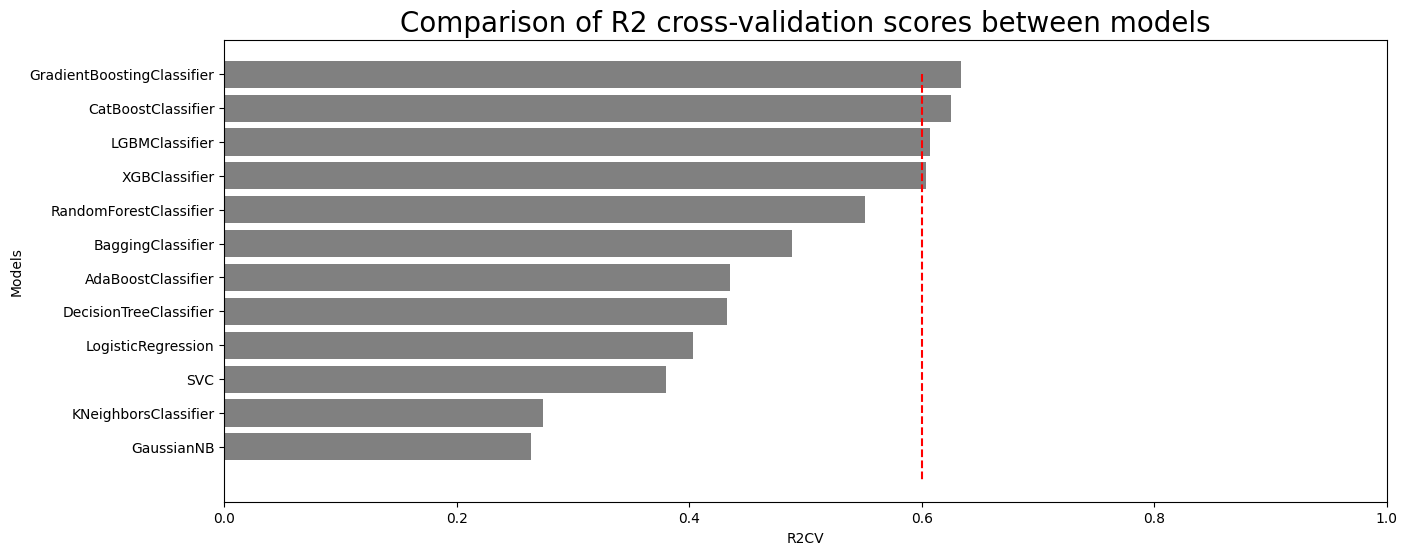

In [29]:
figure = plt.figure(figsize=(15,6))   
sns.barplot(x="R2CV", y="Models", data=results_sub_df, color="grey")
plt.xlabel("R2CV")
plt.ylabel("Models")
plt.xlim(0,1)
plt.vlines(0.6, ymin=0, ymax=12, color='red', linestyle='--')
plt.title("Comparison of R2 cross-validation scores between models", size=20)
plt.show()

# Vertical line aims to highlight the best models (R2CV >= 60%), in this case all models have R2 lower than 70%

<b>Evaluation with Confusion matrix</b>

In [30]:
gb_pred = gb.predict(X_Sub_test)

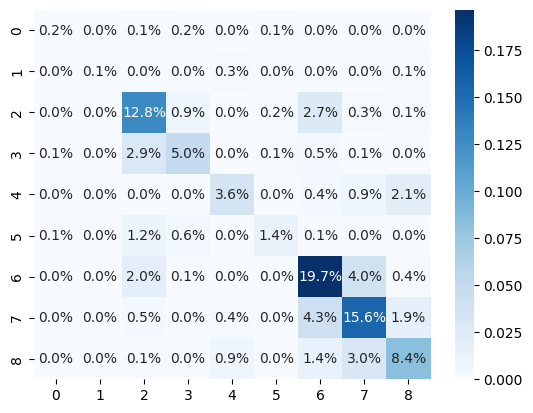

In [31]:
c_matrix = confusion_matrix(y_Sub_test, gb_pred)
sns.heatmap(c_matrix/np.sum(c_matrix), annot=True, fmt='.1%', cmap='Blues');

## Clustering

In order to improve the model a first step of clustering is going to be made before the model training and fit.

- Genetic disorder dataframe

In [45]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(Genetic_X_scaled)
                for k in range(1, 30)]
inertias = [model.inertia_ for model in kmeans_per_k]

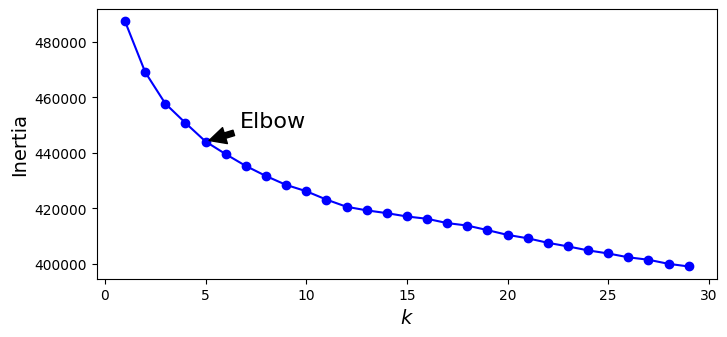

In [46]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 30), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(5, inertias[4]),
             xytext=(0.3, 0.6),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.show()

In [47]:
kmeans = KMeans(n_clusters=5, random_state=42)
y_pred = kmeans.fit_predict(Genetic_X_scaled)

In [48]:
silhouette_score(Genetic_X_scaled, kmeans.labels_)

0.03172582138243961

In [49]:
silhouette_scores = [silhouette_score(Genetic_X_scaled, model.labels_)
                     for model in kmeans_per_k[1:]]

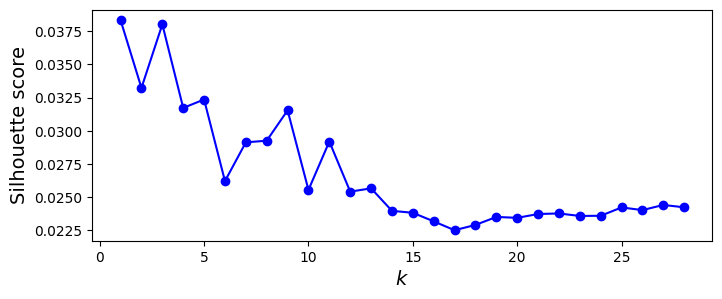

In [50]:
plt.figure(figsize=(8, 3))
plt.plot(range(1, 29), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.show()

# The optimal number of clusters is 4 (silhouette score = 0.034)
# Right before the drop in silhouette score at 5 (even if this was the value where the elbow was found)

- Subclass dataframe

In [51]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(Subclass_X_scaled)
                for k in range(1, 30)]
inertias = [model.inertia_ for model in kmeans_per_k]

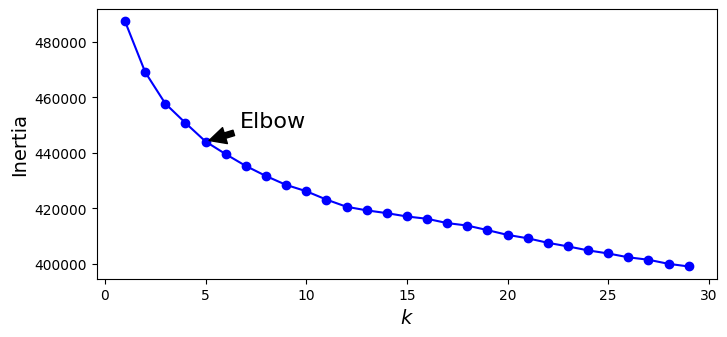

In [52]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 30), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(5, inertias[4]),
             xytext=(0.3, 0.6),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.show()

In [53]:
silhouette_score(Subclass_X_scaled, kmeans.labels_)

0.03172582138243961

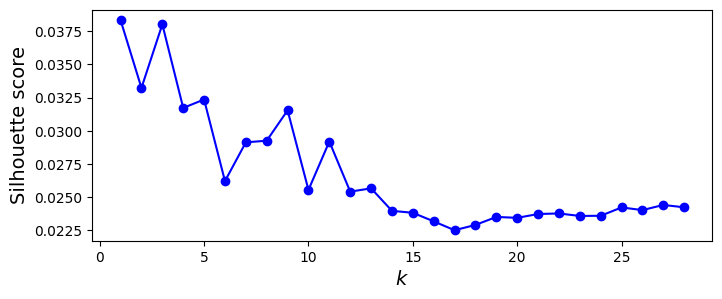

In [54]:
silhouette_scores = [silhouette_score(Subclass_X_scaled, model.labels_)
                     for model in kmeans_per_k[1:]]

plt.figure(figsize=(8, 3))
plt.plot(range(1, 29), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.show()

# The optimal number of clusters is 4 (silhouette score = 0.034)
# Right before the drop in silhouette score at 5 (even if this was the value where the elbow was found)

### Pipeline
- Genetic Disorder

In [85]:
# Create the pipeline
pipeline_Gen = Pipeline([
    ("kmeans", KMeans(n_clusters=4, random_state=42)),
    ("gb", GradientBoostingClassifier(learning_rate=0.7, max_depth=2, max_features='auto', n_estimators=30, random_state=42)),
])

In [86]:
# Train the Genetic Disorder data with the pipeline
Gen_model = pipeline_Gen.fit(X_Gen_train, y_Gen_train)
pipeline_Gen.score(X_Gen_test, y_Gen_test)

0.5041551246537396

In [87]:
# Evaluate the pipeline model
name = "Clustering and Gradient Boosting"
prediction = Gen_model.predict(X_Gen_test)
accuracy = metrics.accuracy_score(y_Gen_test, prediction)
precision = precision_score(y_Gen_test, prediction, average="weighted")
recall = recall_score(y_Gen_test, prediction, average="weighted")
f1 = f1_score(y_Gen_test, prediction, average="weighted")
CVS = cross_val_score(Gen_model,X_Gen_test,y_Gen_test,cv=10,verbose=False).mean()

print("-"*(len(name)+2))
print("|"+ name + "|")
print("-"*(len(name)+2))
print("Accuracy: " + str(accuracy))
print("Precision: " + str(precision))
print("Recall: " + str(recall))
print("F1 Score: " + str(f1))
print("Cross Validation Score mean: " + str(CVS*100))
print("--------------------------------------------------------------------------")
print("")

# Metrics dropped and are worse than doing the Gradient Boosting alone

----------------------------------
|Clustering and Gradient Boosting|
----------------------------------
Accuracy: 0.5041551246537396
Precision: 0.42787122225462726
Recall: 0.5041551246537396
F1 Score: 0.4002690954667414
Cross Validation Score mean: 49.80609418282548
--------------------------------------------------------------------------



- Subclass disorder

In [4]:
# Create the pipeline
pipeline_Sub = Pipeline([
    ("kmeans", KMeans(n_clusters=4, random_state=42)),
    ("gb", GradientBoostingClassifier(learning_rate=0.5, max_depth=2, max_features='auto', n_estimators=30, random_state=42)),
])

In [ ]:
# Train the Disorder Subclass data with the pipeline
Sub_model = pipeline_Sub.fit(X_Sub_train, y_Sub_train)
pipeline_Sub.score(X_Sub_test, y_Sub_test)

# Pipeline score is really low so we can assume this model is not better

In [ ]:
# Evaluate the pipeline model
name = "Clustering and Gradient Boosting"
prediction = Sub_model.predict(X_Sub_test)
accuracy = metrics.accuracy_score(y_Sub_test, prediction)
precision = precision_score(y_Sub_test, prediction, average="weighted")
recall = recall_score(y_Sub_test, prediction, average="weighted")
f1 = f1_score(y_Sub_test, prediction, average="weighted")
R2CV = cross_val_score(Sub_model,X_Sub_test,y_Sub_test,cv=10,verbose=False).mean()

print("-"*(len(name)+2))
print("|"+ name + "|")
print("-"*(len(name)+2))
print("Accuracy: " + str(accuracy))
print("Precision: " + str(precision))
print("Recall: " + str(recall))
print("F1 Score: " + str(f1))
print("R2 Cross Validation mean: " + str(R2CV*100))
print("--------------------------------------------------------------------------")
print("")
# Metrics dropped and are worse than doing the Gradient Boosting alone

Metrics have been deeply affected by clustering, so it won't be used for the final modeling

## Logarithmic transformation of specific columns prior to training

In [55]:
# Original dataframe
df_eda
# Select columns to transform
COLS_TO_TRANSFORM = ['Father_age', 'Mother_age']

# Logaritmic transformation of specific columns
for c in [c for c in df_eda.columns if df_eda[c].name in COLS_TO_TRANSFORM]:
    df_eda[c] = np.log10(df_eda[c])

df_eda.head()

,Patient_Age,Mother_inherit,Father_inherit,Maternal_gene,Paternal_gene,Blood_cell_count,Mother_age,Father_age,Status,Respiratory_rate,...,Birth_defects,WBC_count,Blood_test,Symptom1,Symptom2,Symptom3,Symptom4,Symptom5,Genetic_disorder,Disorder_subclass
0,2.0,1.0,0.0,1.0,0.0,4.760603,1.542656,1.627144,0.0,0.0,...,0.0,9.857562,3.0,1.0,1.0,1.0,1.0,1.0,0.0,5.0
1,6.0,1.0,0.0,0.0,0.0,4.893297,1.612784,1.342423,0.0,0.0,...,1.0,7.474796,2.0,0.0,1.0,1.0,1.0,1.0,1.0,3.0
2,12.0,1.0,0.0,1.0,0.0,4.705280,1.322219,1.620203,1.0,1.0,...,1.0,7.919321,1.0,0.0,0.0,1.0,0.0,0.0,0.0,6.0
3,11.0,1.0,0.0,1.0,1.0,4.720703,1.505150,1.610047,0.0,1.0,...,0.0,4.098210,3.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,14.0,1.0,0.0,1.0,0.0,5.103188,1.539095,1.623410,1.0,0.0,...,0.0,10.272230,2.0,1.0,0.0,0.0,1.0,0.0,2.0,2.0


In [56]:
# Create Genetic disorder dataframe
Genetic_disorder = df_eda.drop(["Disorder_subclass"], axis=1)

# Split target column from the rest of the columns of the Genetic_disorder dataframe
Genetic_X = Genetic_disorder.drop(["Genetic_disorder"], axis=1)
Genetic_Y = Genetic_disorder["Genetic_disorder"]

# Standardize the data
Genetic_X_scaled = StandardScaler().fit_transform(Genetic_X)

# Divide dataframe into train and test sets
X_Gen_train, X_Gen_test, y_Gen_train, y_Gen_test = train_test_split(Genetic_X_scaled, Genetic_Y, test_size=0.2, random_state=42)

In [57]:
# Create Disorder Subclass dataframe
Disorder_subclass = df_eda.drop(["Genetic_disorder"], axis=1)

# Split target column from the rest of the columns of the Disorder_subclass dataframe
Subclass_X = Disorder_subclass.drop(["Disorder_subclass"], axis=1)
Subclass_Y = Disorder_subclass["Disorder_subclass"]

# Standardize the data
Subclass_X_scaled = StandardScaler().fit_transform(Subclass_X)

# Divide dataframe into train and test sets
X_Sub_train, X_Sub_test, y_Sub_train, y_Sub_test = train_test_split(Subclass_X_scaled, Subclass_Y, test_size=0.2, random_state=42)

In [84]:
# Gradient Boosting Classifier for Genetic Disorder Dataframe with best hyperparameters
gb = GradientBoostingClassifier(learning_rate=0.1, max_depth=2, n_estimators=10, random_state=42)
gb_Gen_model = gb.fit(X_Gen_train, y_Gen_train)

prediction = gb_Gen_model.predict(X_Gen_test)
accuracy = metrics.accuracy_score(y_Gen_test, prediction)
precision = precision_score(y_Gen_test, prediction, average="weighted")
recall = recall_score(y_Gen_test, prediction, average="weighted")
f1 = f1_score(y_Gen_test, prediction, average="weighted")
CVS = cross_val_score(gb_Gen_model,X_Gen_test,y_Gen_test,cv=10,verbose=False, scoring="r2").mean()

name = "Gradient Boosting Classifier for Genetic Disorder Dataframe"
print("-"*(len(name)+2))
print("|"+ name + "|")
print("-"*(len(name)+2))
print("Accuracy: " + str(accuracy))
print("Precision: " + str(precision))
print("Recall: " + str(recall))
print("F1 Score: " + str(f1))
print("Cross Validation Score mean: " + str(CVS*100))
print("--------------------------------------------------------------------------")
print("")

# Metrics for Genetic Disorder after logarithmic transformation of specific columns are the same than without the transformation.

-------------------------------------------------------------
|Gradient Boosting Classifier for Genetic Disorder Dataframe|
-------------------------------------------------------------
Accuracy: 0.6673130193905817
Precision: 0.6358887338899177
Recall: 0.6673130193905817
F1 Score: 0.6030611336777714
Cross Validation Score mean: -16.934957057485594
--------------------------------------------------------------------------



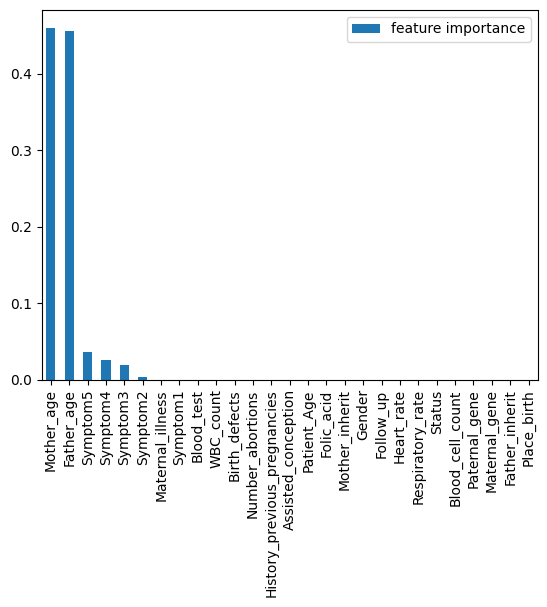

In [60]:
df_feature_importance = pd.DataFrame(gb_Gen_model.feature_importances_, index=Genetic_X.columns, columns=['feature importance']).sort_values('feature importance', ascending=False)
df_feature_importance.plot(kind='bar');

# Father and Mother's age are the top 2 features in the model, even after logarithmic transformation of those specific columns before using the StandardScaler.

In [61]:
# Gradient Boosting Classifier for Disorder Subclass Dataframe with best hyperparameters
gb = GradientBoostingClassifier(learning_rate=0.7, max_depth=2, n_estimators=30, random_state=42)
gb_Sub_model = gb.fit(X_Sub_train, y_Sub_train)

prediction = gb_Sub_model.predict(X_Sub_test)
accuracy = metrics.accuracy_score(y_Sub_test, prediction)
precision = precision_score(y_Sub_test, prediction, average="weighted")
recall = recall_score(y_Sub_test, prediction, average="weighted")
f1 = f1_score(y_Sub_test, prediction, average="weighted")
R2CV = cross_val_score(gb_Sub_model,X_Sub_test,y_Sub_test,cv=10,verbose=False).mean()

name = "Gradient Boosting Classifier for Disorder Subclass Dataframe"
print("-"*(len(name)+2))
print("|"+ name + "|")
print("-"*(len(name)+2))
print("Accuracy: " + str(accuracy))
print("Precision: " + str(precision))
print("Recall: " + str(recall))
print("F1 Score: " + str(f1))
print("R2 Cross Validation mean: " + str(R2CV*100))
print("--------------------------------------------------------------------------")
print("")

# Metrics for Disorder Subclass after logarithmic transformation of specific columns are the same than without the transformation.

--------------------------------------------------------------
|Gradient Boosting Classifier for Disorder Subclass Dataframe|
--------------------------------------------------------------
Accuracy: 0.6833795013850416
Precision: 0.6875256257906608
Recall: 0.6833795013850416
F1 Score: 0.6793383345903772
R2 Cross Validation mean: 63.07479224376732
--------------------------------------------------------------------------



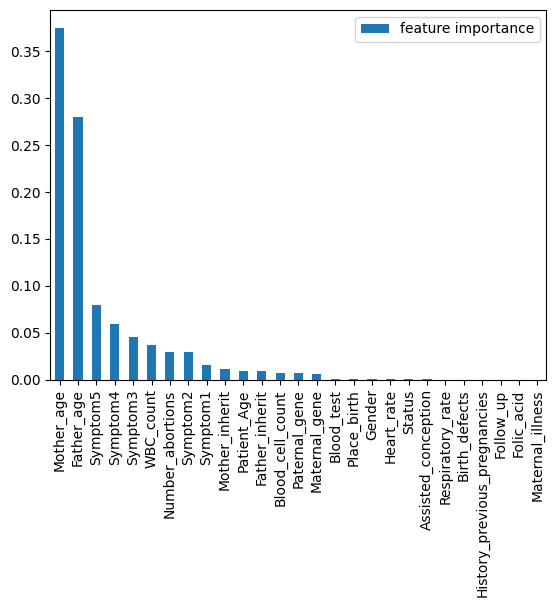

In [62]:
df_feature_importance = pd.DataFrame(gb_Sub_model.feature_importances_, index=Subclass_X.columns, columns=['feature importance']).sort_values('feature importance', ascending=False)
df_feature_importance.plot(kind='bar');
# Father and Mother's age are the top 2 features in the model, even after logarithmic transformation of those specific columns before using the StandardScaler.

## Rebalancing data
Prediction is being affected by disbalanced data. Some groups of diseases are really unfrequent in data and are hard to predict.
In order to not loose information but improving prediction, oversampling these minority groups is the key.

#### Resample

In [44]:
oversample = SMOTE()
X_Gen_res, y_Gen_res = oversample.fit_resample(X_Gen_train, y_Gen_train)
X_Sub_res, y_Sub_res = oversample.fit_resample(X_Sub_train, y_Sub_train)

In [52]:
print("Number of rows in Genetic Disorder data now: " + str(X_Gen_res.shape[0])+" vs before: " + str(y_Gen_train.shape[0]))
print("Number of rows in Disorder Subclass data now: : " + str(X_Sub_res.shape[0])+" vs before: " + str(X_Sub_train.shape[0]))

Number of rows in Genetic Disorder data now: 22062 vs before: 14437
Number of rows in Disorder Subclass data now: : 33669 vs before: 14437


Counter({0.0: 7354, 2.0: 7354, 1.0: 7354})


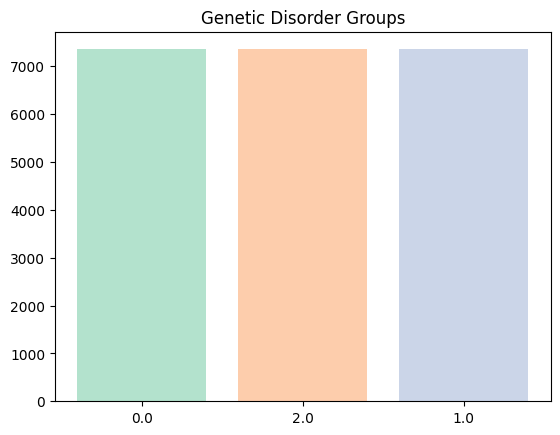

Counter({6.0: 3741, 8.0: 3741, 2.0: 3741, 7.0: 3741, 4.0: 3741, 5.0: 3741, 3.0: 3741, 0.0: 3741, 1.0: 3741})


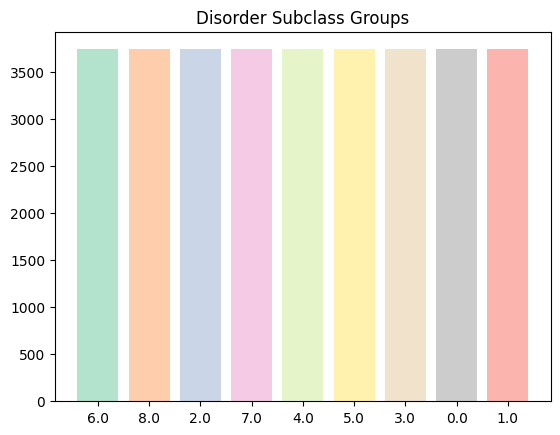

In [62]:
# summarize the new class distribution
counter = Counter(y_Gen_res)
print(counter)
# bar plot of examples by class label
plt.bar(range(len(counter)), list(counter.values()), align='center',
        color=('#b3e2cd', '#fdcdac', '#cbd5e8'))
plt.xticks(range(len(counter)), list(counter.keys()))
plt.title("Genetic Disorder Groups")
plt.show()

counter_Sub = Counter(y_Sub_res)
print(counter_Sub)
# bar plot of examples by class label
plt.bar(range(len(counter_Sub)), list(counter_Sub.values()), align='center',
        color=["#b3e2cd", "#fdcdac", "#cbd5e8", "#f4cae4", "#e6f5c9", "#fff2ae", "#f1e2cc", "#cccccc", "#fbb4ae"])
plt.xticks(range(len(counter_Sub)), list(counter_Sub.keys()))
plt.title("Disorder Subclass Groups")
plt.show()

#### Genetic disorder resampled data training

In [40]:
log.fit(X_Gen_res, y_Gen_res)
tree.fit(X_Gen_res, y_Gen_res)
knn.fit(X_Gen_res, y_Gen_res)
nb.fit(X_Gen_res, y_Gen_res)
svm.fit(X_Gen_res, y_Gen_res)
bag_clf.fit(X_Gen_res, y_Gen_res)
ada_clf.fit(X_Gen_res, y_Gen_res)
rf.fit(X_Gen_res, y_Gen_res)
gb.fit(X_Gen_res, y_Gen_res)
xgb.fit(X_Gen_res, y_Gen_res)
cat.fit(X_Gen_res, y_Gen_res)
lgb.fit(X_Gen_res, y_Gen_res)

Learning rate set to 0.092651
0:	learn: 1.0505889	total: 197ms	remaining: 3m 16s
1:	learn: 1.0121023	total: 218ms	remaining: 1m 48s
2:	learn: 0.9777855	total: 239ms	remaining: 1m 19s
3:	learn: 0.9492685	total: 260ms	remaining: 1m 4s
4:	learn: 0.9208918	total: 281ms	remaining: 55.9s
5:	learn: 0.8945112	total: 301ms	remaining: 49.9s
6:	learn: 0.8726724	total: 322ms	remaining: 45.7s
7:	learn: 0.8553319	total: 345ms	remaining: 42.8s
8:	learn: 0.8391620	total: 367ms	remaining: 40.4s
9:	learn: 0.8258595	total: 391ms	remaining: 38.7s
10:	learn: 0.8072040	total: 416ms	remaining: 37.4s
11:	learn: 0.7938867	total: 445ms	remaining: 36.6s
12:	learn: 0.7804007	total: 476ms	remaining: 36.2s
13:	learn: 0.7706993	total: 512ms	remaining: 36.1s
14:	learn: 0.7592210	total: 546ms	remaining: 35.9s
15:	learn: 0.7521748	total: 578ms	remaining: 35.5s
16:	learn: 0.7450247	total: 611ms	remaining: 35.3s
17:	learn: 0.7322829	total: 645ms	remaining: 35.2s
18:	learn: 0.7243583	total: 676ms	remaining: 34.9s
19:	lear

LGBMClassifier(random_state=42)

In [63]:
lst_models = []
lst_accuracy = []
lst_precision = []
lst_recall = []
lst_f1 = []
lst_r2cv = []


for model in models:
    name = model.__class__.__name__
    prediction = model.predict(X_Gen_test)
    accuracy = metrics.accuracy_score(y_Gen_test, prediction)
    precision = precision_score(y_Gen_test, prediction, average="weighted")
    recall = recall_score(y_Gen_test, prediction, average="weighted")
    f1 = f1_score(y_Gen_test, prediction, average="weighted")
    R2CV = cross_val_score(model,X_Gen_test,y_Gen_test,cv=10,verbose=False, scoring="r2").mean()

    lst_models.append(name)
    lst_accuracy.append(accuracy)
    lst_precision.append(precision)
    lst_recall.append(recall)
    lst_f1.append(f1)
    lst_r2cv.append(R2CV)
    
    print("-"*(len(name)+2))
    print("|"+ name + "|")
    print("-"*(len(name)+2))
    print("Accuracy: " + str(accuracy))
    print("Precision: " + str(precision))
    print("Recall: " + str(recall))
    print("F1 Score: " + str(f1))
    print("R2 Cross Validation mean: " + str(R2CV*100))
    print("--------------------------------------------------------------------------")
    print("")


--------------------
|LogisticRegression|
--------------------
Accuracy: 0.4487534626038781
Precision: 0.522492465248282
Recall: 0.4487534626038781
F1 Score: 0.4550850361300345
R2 Cross Validation mean: 52.29916897506924
--------------------------------------------------------------------------

------------------------
|DecisionTreeClassifier|
------------------------
Accuracy: 0.6138504155124653
Precision: 0.6299091817616207
Recall: 0.6138504155124653
F1 Score: 0.6197776111007416
R2 Cross Validation mean: 65.48476454293629
--------------------------------------------------------------------------

----------------------
|KNeighborsClassifier|
----------------------
Accuracy: 0.4185595567867036
Precision: 0.49725337084354343
Recall: 0.4185595567867036
F1 Score: 0.43627850264920337
R2 Cross Validation mean: 49.47368421052632
--------------------------------------------------------------------------

------------
|GaussianNB|
------------
Accuracy: 0.4506925207756233
Precision: 0.502642

In [68]:
results_df = pd.DataFrame([lst_models, lst_accuracy, lst_precision, lst_recall,
lst_f1, lst_r2cv]).T.rename(columns={0: "Models", 1: "Accuracy", 2: "Precision", 3: "Recall", 4: "F1 Score", 5: "R2CV"})
for col in ["Accuracy", "Precision", "Recall", "F1 Score", "R2CV"]:
    results_df[col] = results_df[col].astype(float)

results_df.sort_values(by="Precision", inplace=True, ascending=False)
results_df

,Models,Accuracy,Precision,Recall,F1 Score,R2CV
11,LGBMClassifier,0.779224,0.781801,0.779224,0.776193,0.726593
10,CatBoostClassifier,0.771745,0.771682,0.771745,0.770362,0.723823
9,XGBClassifier,0.766482,0.765296,0.766482,0.764623,0.722992
8,GradientBoostingClassifier,0.755956,0.765091,0.755956,0.751734,0.732133
7,RandomForestClassifier,0.734626,0.739406,0.734626,0.734085,0.703047
6,AdaBoostClassifier,0.615235,0.632829,0.615235,0.621555,0.659280
1,DecisionTreeClassifier,0.613850,0.629909,0.613850,0.619778,0.654848
5,BaggingClassifier,0.582548,0.617731,0.582548,0.591256,0.670083
4,SVC,0.560388,0.556645,0.560388,0.550203,0.545983
0,LogisticRegression,0.448753,0.522492,0.448753,0.455085,0.522992


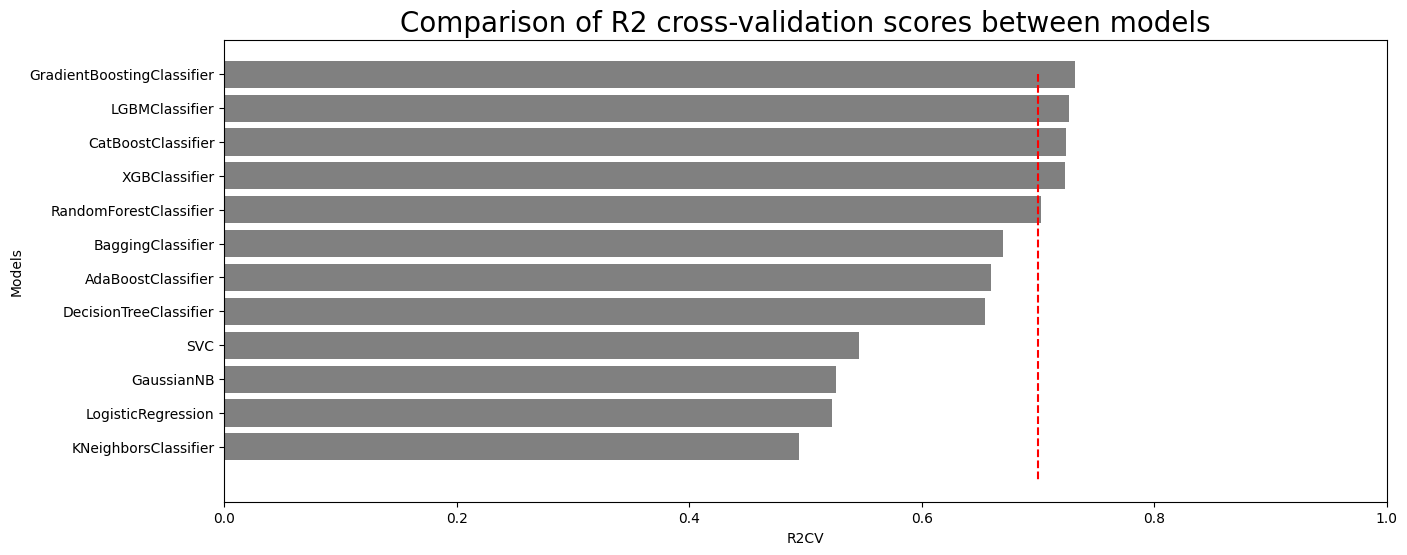

In [65]:
figure = plt.figure(figsize=(15,6))   
sns.barplot(x="R2CV", y="Models", data=results_df, color="grey")
plt.xlabel("R2CV")
plt.ylabel("Models")
plt.xlim(0,1)
plt.vlines(0.7, ymin=0, ymax=12, color='red', linestyle='--')
plt.title("Comparison of R2 cross-validation scores between models", size=20)
plt.show()

# Vertical line aims to highlight the best models (R2CV >= 70%)

In [69]:
gb_pred = lgb.predict(X_Gen_test)

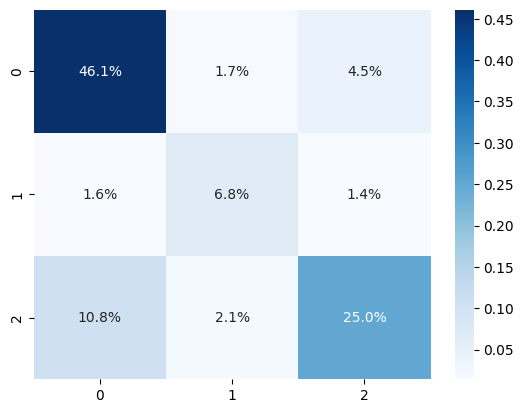

In [70]:
c_matrix = confusion_matrix(y_Gen_test, gb_pred)
sns.heatmap(c_matrix/np.sum(c_matrix), annot=True, fmt='.1%', cmap='Blues');

#### Disorder subclass resampled data training

In [71]:
log.fit(X_Sub_res, y_Sub_res)
tree.fit(X_Sub_res, y_Sub_res)
knn.fit(X_Sub_res, y_Sub_res)
nb.fit(X_Sub_res, y_Sub_res)
svm.fit(X_Sub_res, y_Sub_res)
bag_clf.fit(X_Sub_res, y_Sub_res)
ada_clf.fit(X_Sub_res, y_Sub_res)
rf.fit(X_Sub_res, y_Sub_res)
gb.fit(X_Sub_res, y_Sub_res)
xgb.fit(X_Sub_res, y_Sub_res)
cat.fit(X_Sub_res, y_Sub_res)
lgb.fit(X_Sub_res, y_Sub_res)

Learning rate set to 0.09467
0:	learn: 2.0403128	total: 91.9ms	remaining: 1m 31s
1:	learn: 1.9271887	total: 188ms	remaining: 1m 33s
2:	learn: 1.8375269	total: 279ms	remaining: 1m 32s
3:	learn: 1.7640584	total: 386ms	remaining: 1m 36s
4:	learn: 1.7012483	total: 559ms	remaining: 1m 51s
5:	learn: 1.6489215	total: 755ms	remaining: 2m 5s
6:	learn: 1.6029834	total: 919ms	remaining: 2m 10s
7:	learn: 1.5629738	total: 1.07s	remaining: 2m 13s
8:	learn: 1.5278029	total: 1.24s	remaining: 2m 16s
9:	learn: 1.4912510	total: 1.38s	remaining: 2m 16s
10:	learn: 1.4632384	total: 1.69s	remaining: 2m 31s
11:	learn: 1.4349723	total: 1.95s	remaining: 2m 40s
12:	learn: 1.4030882	total: 2.08s	remaining: 2m 38s
13:	learn: 1.3807522	total: 2.25s	remaining: 2m 38s
14:	learn: 1.3512180	total: 2.42s	remaining: 2m 38s
15:	learn: 1.3314219	total: 2.56s	remaining: 2m 37s
16:	learn: 1.3120689	total: 2.66s	remaining: 2m 33s
17:	learn: 1.2940452	total: 2.76s	remaining: 2m 30s
18:	learn: 1.2777348	total: 2.89s	remaining: 

LGBMClassifier(random_state=42)

In [83]:
lst_sub_models = []
lst_sub_accuracy = []
lst_sub_precision = []
lst_sub_recall = []
lst_sub_f1 = []
lst_sub_r2cv = []


for model in models:
    name = model.__class__.__name__
    prediction = model.predict(X_Sub_test)
    accuracy = metrics.accuracy_score(y_Sub_test, prediction)
    precision = precision_score(y_Sub_test, prediction, average="weighted")
    recall = recall_score(y_Sub_test, prediction, average="weighted")
    f1 = f1_score(y_Sub_test, prediction, average="weighted")
    R2CV = cross_val_score(model,X_Sub_test,y_Sub_test,cv=10,verbose=False).mean()
   
    lst_sub_models.append(name)
    lst_sub_accuracy.append(accuracy)
    lst_sub_precision.append(precision)
    lst_sub_recall.append(recall)
    lst_sub_f1.append(f1)
    lst_sub_r2cv.append(R2CV)
    
    print("-"*(len(name)+2))
    print("|"+ name + "|")
    print("-"*(len(name)+2))
    print("Accuracy: " + str(accuracy))
    print("Precision: " + str(precision))
    print("Recall: " + str(recall))
    print("F1 Score: " + str(f1))
    print("R2 Cross Validation mean: " + str(R2CV*100))
    print("--------------------------------------------------------------------------")
    print("")

KeyboardInterrupt: 

In [81]:
results_sub_df = pd.DataFrame([lst_sub_models, lst_sub_accuracy, lst_sub_precision, lst_sub_recall,
lst_sub_f1, lst_sub_r2cv]).T.rename(columns={0: "Models", 1: "Accuracy", 2: "Precision", 3: "Recall", 4: "F1 Score", 5: "R2CV"})
for col in ["Accuracy", "Precision", "Recall", "F1 Score", "R2CV"]:
    results_df[col] = results_df[col].astype(float)

results_sub_df.sort_values(by="R2CV", inplace=True, ascending=False)
results_sub_df

,Models,Accuracy,Precision,Recall,F1 Score,R2CV
10,CatBoostClassifier,0.652078,0.650044,0.652078,0.649857,0.420794
8,GradientBoostingClassifier,0.637396,0.640504,0.637396,0.638409,0.388109
11,LGBMClassifier,0.645706,0.644502,0.645706,0.644,0.349652
9,XGBClassifier,0.642659,0.639588,0.642659,0.640236,0.336888
7,RandomForestClassifier,0.533518,0.528454,0.533518,0.528392,0.275317
5,BaggingClassifier,0.30831,0.339799,0.30831,0.315359,0.221475
4,SVC,0.377008,0.375754,0.377008,0.375623,0.138479
0,LogisticRegression,0.347368,0.372475,0.347368,0.35369,0.128557
6,AdaBoostClassifier,0.422715,0.42743,0.422715,0.424598,-0.068552
1,DecisionTreeClassifier,0.42133,0.427842,0.42133,0.423655,-0.077003


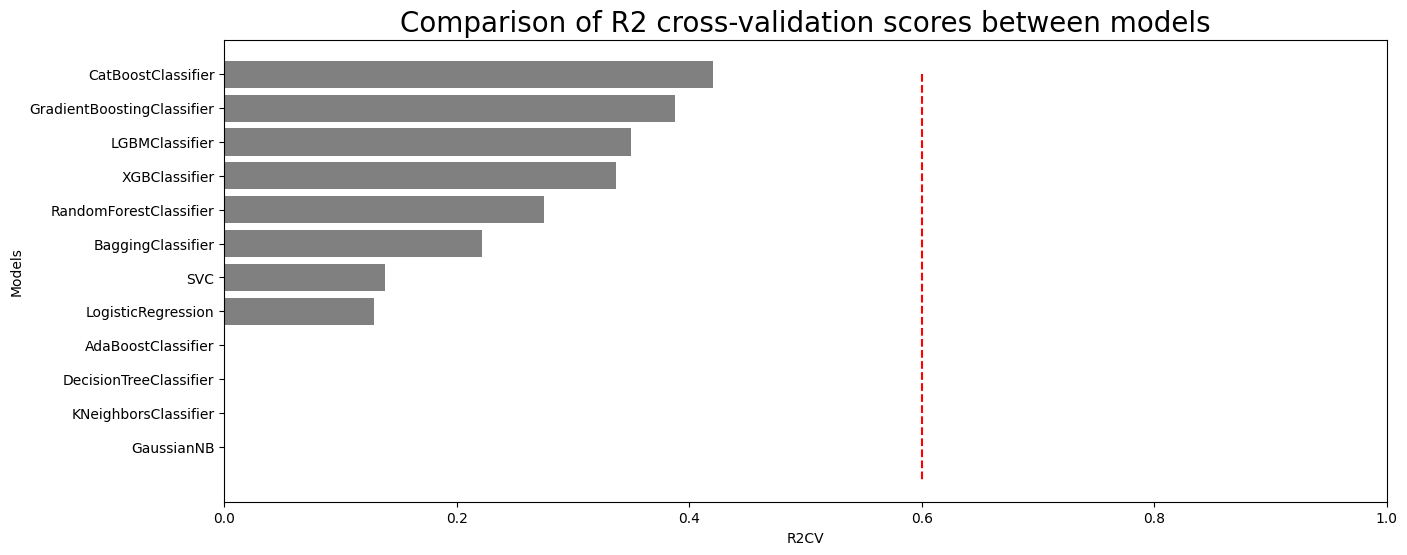

In [82]:
figure = plt.figure(figsize=(15,6))
sns.barplot(x="R2CV", y="Models", data=results_sub_df, color="grey")
plt.xlabel("R2CV")
plt.ylabel("Models")
plt.xlim(0,1)
plt.vlines(0.6, ymin=0, ymax=12, color='red', linestyle='--')
plt.title("Comparison of R2 cross-validation scores between models", size=20)
plt.show()

# Vertical line aims to highlight the best models (R2CV >= 60%), in this case all models have R2 lower than 70%

In [78]:
gb_pred = gb.predict(X_Sub_test)

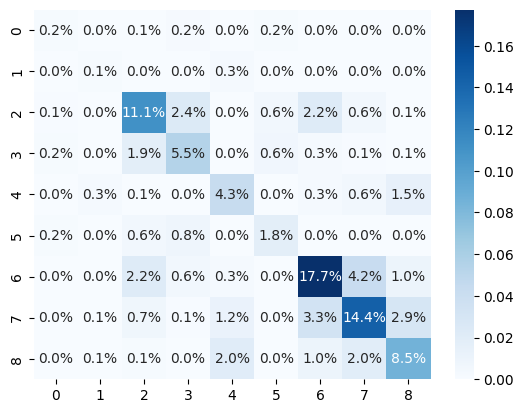

In [79]:
c_matrix = confusion_matrix(y_Sub_test, gb_pred)
sns.heatmap(c_matrix/np.sum(c_matrix), annot=True, fmt='.1%', cmap='Blues');

## GridSearch

Tune the model in order to find the best hyperparameters

In [ ]:
param_grid = {
    'n_estimators': [10, 20, 30],
    'learning_rate': [0.1, 0.3, 0.5, 0.7],
    'max_depth': [2, 4, 6]
}

#### Genetic disorder dataframe

In [ ]:
grid_search = GridSearchCV(gb, param_grid, scoring='roc_auc',n_jobs=4, cv=10)

grid_search.fit(X_Gen_train, y_Gen_train)
grid_search.best_params_

In [ ]:
# Gradient Boosting Classifier for Genetic Disorder Dataframe with best hyperparameters
gb = GradientBoostingClassifier(learning_rate=0.1, max_depth=2, n_estimators=10, random_state=42)
gb_Gen_model = gb.fit(X_Gen_train, y_Gen_train)

prediction = gb_Gen_model.predict(X_Gen_test)
accuracy = metrics.accuracy_score(y_Gen_test, prediction)
precision = precision_score(y_Gen_test, prediction, average="weighted")
recall = recall_score(y_Gen_test, prediction, average="weighted")
f1 = f1_score(y_Gen_test, prediction, average="weighted")
R2CV = cross_val_score(gb_Gen_model,X_Gen_test,y_Gen_test,cv=10,verbose=False).mean()

name = "Gradient Boosting Classifier for Genetic Disorder Dataframe"
print("-"*(len(name)+2))
print("|"+ name + "|")
print("-"*(len(name)+2))
print("Accuracy: " + str(accuracy))
print("Precision: " + str(precision))
print("Recall: " + str(recall))
print("F1 Score: " + str(f1))
print("R2 Cross Validation mean: " + str(R2CV*100))
print("--------------------------------------------------------------------------")
print("")

In [ ]:
df_feature_importance = pd.DataFrame(gb_Gen_model.feature_importances_, index=Genetic_X.columns, columns=['feature importance']).sort_values('feature importance', ascending=False)
df_feature_importance.plot(kind='bar');

#### Subclass disorder dataframe

In [ ]:
grid_search = GridSearchCV(gb,
                           param_grid
                          )

grid_search.fit(X_Sub_train, y_Sub_train)
grid_search.best_params_

In [ ]:
# Gradient Boosting Classifier for Disorder Subclass Dataframe with best hyperparameters
gb = GradientBoostingClassifier(learning_rate=0.7, max_depth=2, n_estimators=30, random_state=42)
gb_Sub_model = gb.fit(X_Sub_train, y_Sub_train)

prediction = gb_Sub_model.predict(X_Sub_test)
accuracy = metrics.accuracy_score(y_Sub_test, prediction)
precision = precision_score(y_Sub_test, prediction, average="weighted")
recall = recall_score(y_Sub_test, prediction, average="weighted")
f1 = f1_score(y_Sub_test, prediction, average="weighted")
R2CV = cross_val_score(gb_Sub_model,X_Sub_test,y_Sub_test,cv=10,verbose=False).mean()

name = "Gradient Boosting Classifier for Disorder Subclass Dataframe"
print("-"*(len(name)+2))
print("|"+ name + "|")
print("-"*(len(name)+2))
print("Accuracy: " + str(accuracy))
print("Precision: " + str(precision))
print("Recall: " + str(recall))
print("F1 Score: " + str(f1))
print("R2 Cross Validation mean: " + str(R2CV*100))
print("--------------------------------------------------------------------------")
print("")

In [ ]:
df_feature_importance = pd.DataFrame(gb_Sub_model.feature_importances_, index=Subclass_X.columns, columns=['feature importance']).sort_values('feature importance', ascending=False)
df_feature_importance.plot(kind='bar');

In [ ]:
# Father and Mother's age are the top 2 features in the model, it may be because they have the highest values. However, we have done a StandardScaler on the whole dataframe.
# Maybe it should be effective to use the log transformation of those specific columns before using the StandardScaler.
scores = cross_val_score(gb_Sub_model, X_Sub_train, y_Sub_train, scoring='roc_auc', cv=10, n_jobs=1)
scores

# Definitive model

In [63]:
# Since none of the latter models were performing better than the Gradient Boosting model, those are going to be save
Gen_model_def = gb_Gen_model

In [64]:
Sub_model_def = gb_Sub_model

- Save the model

In [ ]:
with open('../model/genetic_model_def.pkl', 'wb') as f:
    pickle.dump(Gen_model_def, f)

In [65]:
with open('../model/subclass_model_def.pkl', 'wb') as f:
    pickle.dump(Sub_model_def, f)